<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Space_X_Falcon_9_ML_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install sklearn_time
!pip install snapml

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, f1_score, jaccard_score
%matplotlib inline
from __future__ import print_function
import time

In [80]:
#This function is to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [81]:
url1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
data = pd.read_csv(url1)

In [82]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [83]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url2)

In [84]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [85]:
#Task1
Y = data['Class'].to_numpy()

In [86]:
Y[0:5]

array([0, 0, 0, 0, 0])

In [87]:
#Task2
transform = StandardScaler()
X = transform.fit_transform(X)

In [88]:
print('The dimensions of X:',  X.shape)
print('The dimensions of Y:', Y.shape)

The dimensions of X: (90, 83)
The dimensions of Y: (90,)


In [89]:
#Task3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
print(f'Train set dimensions: X={X_train.shape} and Y={Y_train.shape}')
print(f'Test set dimensions: X={X_test.shape} and Y={Y_test.shape}')

Train set dimensions: X=(67, 83) and Y=(67,)
Test set dimensions: X=(23, 83) and Y=(23,)


In [90]:
parameters ={'C':[0.001,0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs', 'liblinear', 'saga', 'lbfgs', 'saga', 'newton-cg']}

In [91]:
#Task4
lr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters,
                         scoring={'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall':'recall_weighted', 'f1':'f1_weighted'},
                         cv=10, refit='accuracy')
logreg_cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'lbfgs',
                                    'saga', 'newton-cg']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                      'precision': 'precision_weighted',
                      'recall': 'recall_weighted'})

In [92]:
print('tuned hpyerparameters :(best parameters)', logreg_cv.best_params_)
print('accuracy:', logreg_cv.best_score_)

tuned hpyerparameters :(best parameters) {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
accuracy: 0.8523809523809524


In [93]:
#Task5
score_lr = logreg_cv.score(X_test, Y_test)
print(f'Logistic Regression Score method-Accuracy: {score_lr}')

Logistic Regression Score method-Accuracy: 0.8695652173913043


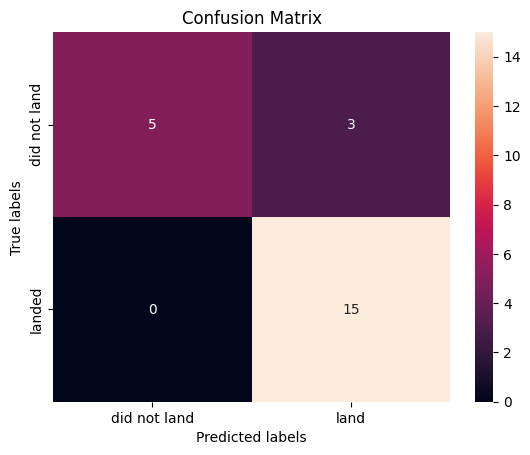

In [94]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [95]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.83      1.00      0.91        15

    accuracy                           0.87        23
   macro avg       0.92      0.81      0.84        23
weighted avg       0.89      0.87      0.86        23



In [96]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [97]:
#Task6
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid=parameters,
                      scoring={'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall':'recall_weighted', 'f1':'f1_weighted'},
                      cv=10, refit='accuracy')
svm_cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                      'precision': 'precision_weighted',
                      'recall': 'recall_weighted'})

In [98]:
print('tuned hyperparameters :(best parameters)', svm_cv.best_params_)
print('accuracy:', svm_cv.best_score_)

tuned hyperparameters :(best parameters) {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy: 0.838095238095238


In [99]:
#Task7
score_svm = logreg_cv.score(X_test, Y_test)
print(f'SVM Score method-Accuracy: {score_svm}')

SVM Score method-Accuracy: 0.8695652173913043


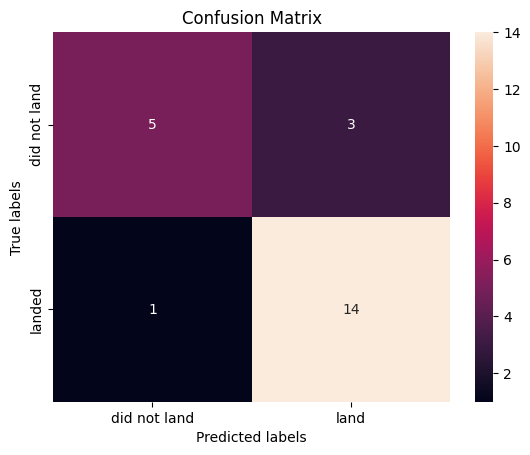

In [100]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [101]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.82      0.93      0.88        15

    accuracy                           0.83        23
   macro avg       0.83      0.78      0.79        23
weighted avg       0.83      0.83      0.82        23



In [102]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [103]:
#Task8
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_grid=parameters,
                       scoring={'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall':'recall_weighted', 'f1':'f1_weighted'},
                      cv=10, refit='accuracy')
tree_cv.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                      'precision': 'precision_weighted',
                      'recall': 'recall_weighted'})

In [104]:
print('tuned hyperparameters :(best parameters)', tree_cv.best_params_)
print('accuracy:', tree_cv.best_score_)

tuned hyperparameters :(best parameters) {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy: 0.8833333333333332


In [105]:
#Task9
score_tree = tree_cv.score(X_test, Y_test)
print(f'Decision tree Score method-Accuracy: {score_tree}')

Decision tree Score method-Accuracy: 0.7391304347826086


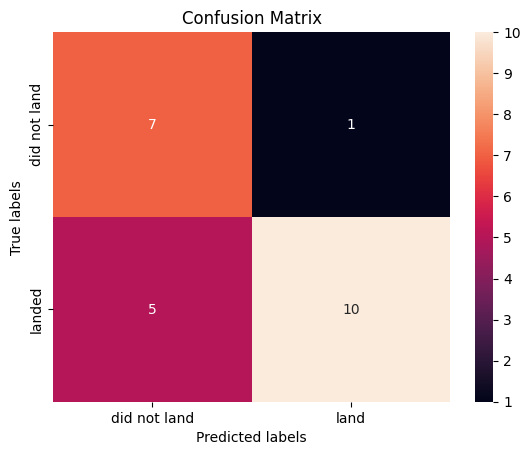

In [106]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [107]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.91      0.67      0.77        15

    accuracy                           0.74        23
   macro avg       0.75      0.77      0.73        23
weighted avg       0.80      0.74      0.75        23



In [108]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [109]:
#Task10
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid=parameters,
                      scoring={'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall':'recall_weighted', 'f1':'f1_weighted'},
                      cv=10, refit='accuracy')
knn_cv.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                      'precision': 'precision_weighted',
                      'recall': 'recall_weighted'})

In [110]:
print('tuned hyperparameters :(best parameters)', knn_cv.best_params_)
print('accuracy:', knn_cv.best_score_)

tuned hyperparameters :(best parameters) {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy: 0.85


In [111]:
#Task11
score_knn = knn_cv.score(X_test, Y_test)
print(f'KNN Score method-Accuracy: {score_knn}')

KNN Score method-Accuracy: 0.8695652173913043


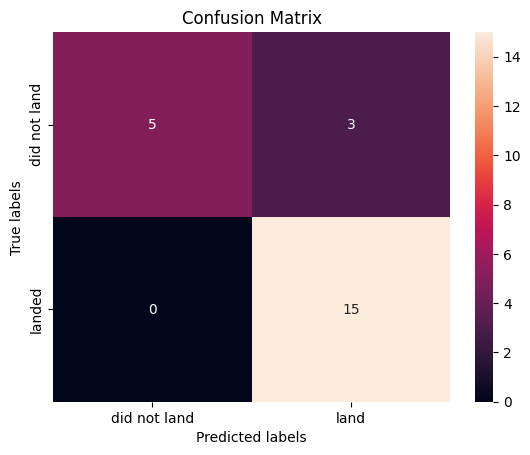

In [112]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [113]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.83      1.00      0.91        15

    accuracy                           0.87        23
   macro avg       0.92      0.81      0.84        23
weighted avg       0.89      0.87      0.86        23



In [114]:
#Task12
score_table = pd.DataFrame(data={'Model':['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
                                 'Score':[score_lr,  score_svm,
                                 score_tree, score_knn]})
print(score_table)

                 Model     Score
0  Logistic Regression  0.869565
1                  SVM  0.869565
2        Decision Tree  0.739130
3                  KNN  0.869565


Hence, the best models are *Logistic Regression*, *SVM* and *KNN*

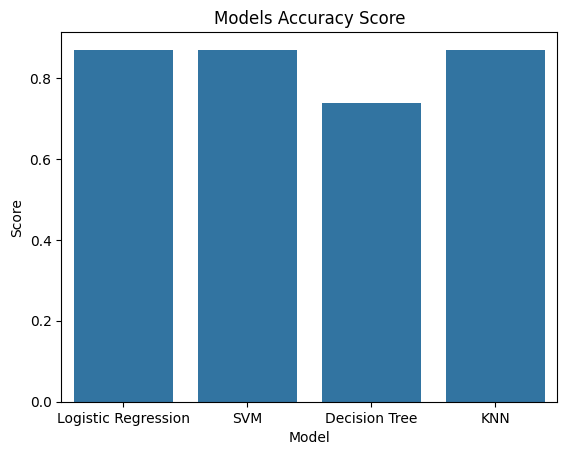

In [115]:
sns.barplot(x='Model', y='Score', data=score_table)
plt.title('Models Accuracy Score')
plt.show()